In [1]:
import numpy as np
from scipy import stats
import scipy
import matplotlib.pyplot as plt

# Problem 1: Modeling of Noisy Data

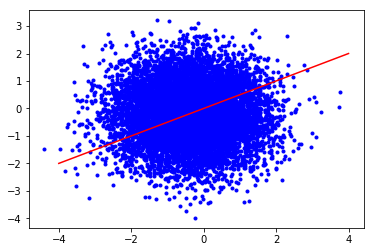

In [2]:
# Part a)
# Simulated each measurement as explained in the problem statement and graphed the scatter plot of the data overlayed with
# the correct model
a = 0.5
z = np.random.uniform(-1, 1)
x = z + np.random.randn(10000)
y = a*z + np.random.randn(10000)

x_actual = np.linspace(-4, 4)
y_actual = a*x_actual

plt.plot(x, y, 'b.')
plt.plot(x_actual, y_actual, 'r-')
plt.show()

### Part b)
> The $\chi^2$ expression for this model is given below.To calculate the best fit for the data, we minimize this expression with respect to a and evaluate given the data points.
> $$\chi^2=\sum_{i=1}^N\frac{(y_i-y(x_i|a))^2}{\sigma_i^2}=\sum_{i=1}^N\frac{(y_i-ax_i)^2}{\sigma_i^2}$$
> $$\frac{\partial\chi^2}{\partial a}=\frac{\partial}{\partial a}\sum_{i=1}^N\frac{(y_i-ax_i)^2}{\sigma_i^2}=\sum_{i=1}^N\frac{-2(y_i-ax_i)x_i}{\sigma_i^2}=0$$
> $$\sum_{i=1}^N\frac{y_ix_i}{\sigma_i^2}-a\sum_{i=1}^N\frac{x_i^2}{\sigma_i^2}=0$$
> $$a=\frac{\sum_{i=1}^N\frac{y_ix_i}{\sigma_i^2}}{\sum_{i=1}^N\frac{x_i^2}{\sigma_i^2}}=\frac{\sum_{i=1}^Ny_ix_i}{\sum_{i=1}^Nx_i^2}$$
> where $\sigma_i=1$ because each individual points has an error which is distributed according to a standard Gaussian distribution. To determine the standard deviation in the parameter estimation, we use the following formula.
> $$\sigma_a^2=\biggr(\frac{1}{2}\frac{\partial^2\chi^2}{\partial a^2}\biggr|_{\tilde{a}}\biggr)^{-1}$$
> where $$\frac{\partial\chi^2}{\partial a}=\sum_{i=1}^N\frac{-2x_i(y-ax_i)}{\sigma_i^2}$$
> $$\frac{\partial^2\chi^2}{\partial a^2}=\sum_{i=1}^N\frac{2x_i^2}{\sigma_i^2}=2\sum_{i=1}^Nx_i^2$$
> So, $$\sigma_a^2=\biggr(\frac{1}{2}\cdot2\sum_{i=1}^Nx_i^2\biggr)^{-1}=\biggr(\sum_{i=1}^Nx_i^2\biggr)^{-1}$$
> From the calculation of the variance in our estimate, we can determine the number of standard deviations our estimate is from the actual value as shown below. $$n=\frac{|a-a_{estimate}|}{\sigma_a}$$
> Then, to get the gaussian probability of being off by this many standard deviations, we calculate the following.
> $$P(|a_{estimate}-a|\geq n\sigma_a)=1-P(|a_{estimate}-a|\leq n\sigma_a)=1-P(-n\sigma_a\leq a_{estimate}-a\leq n\sigma_a)=1-P\biggr(-n\leq\frac{a_{estimate}-a}{\sigma_a}\leq n\biggr)$$
> where $\frac{a_{estimate}-a}{\sigma_a}$ is distributed according to a standard Gaussian distribution.

In [3]:
# All calculations here are done according to the equations given above
a_estimate = np.sum(y*x)/np.sum(x**2)
sigma_a = np.sqrt(1/np.sum(x**2))
print("This least squares estimate yields a value of: " + str(a_estimate) + " with standard deviation: "
      + str(sigma_a))

num_stdev = abs(a-a_estimate)/sigma_a
probability = 2*(1-stats.norm.cdf(num_stdev))
print("The estimate is " + str(num_stdev) + " standard deviations from the actual value. The probability of being off by "
     "at least this many standard deviations is: " + str(probability))

def chi2(a_):
    return np.sum((y-a_*x)**2)

result = scipy.optimize.minimize(chi2, x0=0.2)
print(result)

This least squares estimate yields a value of: 0.0508604575587633 with standard deviation: 0.009204164181982574
The estimate is 48.797428377086185 standard deviations from the actual value. The probability of being off by at least this many standard deviations is: 0.0
      fun: 10348.595810169369
 hess_inv: array([[4.23583192e-05]])
      jac: array([0.00012207])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 123
      nit: 1
     njev: 37
   status: 2
  success: False
        x: array([0.05086045])


### Part c)
> The $\chi^2$ expression for this model is given below.
> $$\chi^2=\sum_{i=1}^N\frac{(y_i-y(x_i|a))^2}{\sigma_i^2}=\sum_{i=1}^N\frac{(y_i-ax_i)^2}{\sigma_y^2+a^2\sigma_x^2}$$
> where $\sigma_y=\sigma_x=1$.
> $$\frac{\partial\chi^2}{\partial a}=\frac{\partial}{\partial a}\frac{\sum_{i=1}^Ny_i-ax_i^2}{1+a^2}=\frac{-2\sum_{i=1}^N(y_i-ax_i)x_i(1+a^2)-2a\sum_{i=1}^N(y_i-ax_i)^2}{(1+a^2)^2}=0$$
> Through a bit of algebra, we obtain the following:
> $$a=\frac{-\sum_{i=1}^N(x_i^2-y_i^2)\pm\sqrt{(\sum_{i=1}^N(x_i^2-y_i^2))^2+4(\sum_{i=1}^Nx_iy_i)^2}}{2\sum_{i=1}^Nx_iy_i}$$

In [29]:
a1 = np.sum(x*y)
b1 = np.sum(x**2-y**2)
c1 = -a1

a_estimate_w = (-b1+np.sqrt(b1**2-4*a1*c1))/(2*a1)
print("This least squares estimate yields a value of: " + str(a_estimate_w))

This least squares estimate yields a value of: 0.4812791519819821


### Part d)
> Now we must replace the $\sigma_x$ with $1.15\sigma_x$ and $\sigma_y$ with $0.7\sigma_y$. Doing so yields the following chi-square expression.
> $$\chi^2=\frac{\sum_{i=1}^N(y_i-ax_i)^2}{0.49\sigma_y^2+1.3225a^2\sigma_x^2}$$
> where $\sigma_y=\sigma_x=1$ again. 
> Differentiating with respect to a and solving for a yields the following expression for the estimate of a:
> $$a=\frac{-\sum_{i=1}^N(0.49x_i^2-1.3225y_i^2)\pm\sqrt{(\sum_{i=1}^N(0.49x_i^2-1.3225y_i^2))^2+4(1.3225\sum_{i=1}^Nx_iy_i)(0.49\sum_{i=1}^Nx_iy_i)}}{2.645\sum_{i=1}^Nx_iy_i}$$

In [30]:
a_e = 1.3225*a1
b_e = np.sum(0.49*x**2-1.3225*y**2)
c_e = -0.49*a1

a_estimate_w_error = (-b_e+np.sqrt(b_e**2-4*a_e*c_e))/(2*a_e)
print("The least square estimate with under and overestimated errors is: " + str(a_estimate_w_error))

chi_sq = np.sum((y-a_estimate_w_error*x)**2)/(0.49+1.3225*a_estimate_w_error**2)
print("The value of chi-squared that we get with this estimated parameter is: " + str(chi_sq))
print("This estimate for a is not good since the chi-square value for this estimate is almost 20% higher than the expected "
      "chi-square value for a good fit to the model.")

The least square estimate with under and overestimated errors is: 1.4720751748708367
The value of chi-squared that we get with this estimated parameter is: 11671.042702428613
This estimate for a is not good since the chi-square value for this estimate is almost 20% higher than the expected chi-square value for a good fit to the model.


In [31]:
# Part e)
# Data is simulated as described in the problem statement
x1 = z + np.sqrt(abs(z))*np.random.randn(10000)
y1 = a*z + np.random.randn(10000)

In [32]:
# The code below is used to approximate a numerical solution for an estimate for a in both the cases described in the
# problem statement. We use a grid of 10000 possible values for a in a certain reasonable interval and determine the a value
# that yields the smallest chi-square value in that region. I created two seperate function that are the chi-square functions
# for each case and then the two loops find the value of a that produces a minimum. Once the minimum values are found, I
# calculate the standard deviation by finding the a value which satisfies the expression given in the problem statement. To
# do so, I loop through a certain range of values of a that satisfy the condition and once the condition is broken, I take the
# last value that satisfied the expression. I do this for both scenarios and then print out the results.
def f_x(n):
    return np.sum((y1-n*x1)**2/(1+abs(x1)*n**2))

def f_z(n):
    return np.sum((y1-n*x1)**2/(1+abs(z)*n**2))

a_vals = np.linspace(0, 10, 10000)
min_a_x = 0
min_a_z = 0

for i in a_vals:
    current_a = i
    if(f_x(current_a) <= f_x(min_a_x)):
        min_a_x = current_a
    if(f_z(current_a) <= f_z(min_a_z)):
        min_a_z = current_a

chi_square_min_x = f_x(min_a_x)
chi_square_min_z = f_z(min_a_z)

a_vals_err_x = np.linspace(min_a_x, min_a_x+0.1, 10000)
a_vals_err_z = np.linspace(min_a_z, min_a_z+0.1, 10000)

error_a_x = 0
for i in a_vals_err_x:
    current_a = i
    if(f_x(current_a) <= chi_square_min_x+1):    
        error_a_x = current_a
    else:
        break

error_a_x = (error_a_x-min_a_x)/2
num_stdev_x = abs(min_a_x-a)/error_a_x

error_a_z = 0
for i in a_vals_err_z:
    current_a = i
    if(f_z(current_a) <= chi_square_min_z+1):    
        error_a_z = current_a
    else:
        break

error_a_z = (error_a_z-min_a_z)/2
num_stdev_z = abs(min_a_z-a)/error_a_z

print("For the model with |x_i| as the variance in x, we receive an estimate for a of: " + str(min_a_x) + " with standard "
     "deviation: " + str(error_a_x) + ". This estimate is off by " + str(num_stdev_x) + " standard deviations.")
print("For the model with |z_i| as the variance in x, we receive an estimate for a of: " + str(min_a_z) + " with standard "
     "deviation: " + str(error_a_z) + ". This estimate is off by " + str(num_stdev_z) + " standard deviations.")

For the model with |x_i| as the variance in x, we receive an estimate for a of: 0.8000800080008 with standard deviation: 0.015476547654765471. This estimate is off by 19.38933764135703 standard deviations.
For the model with |z_i| as the variance in x, we receive an estimate for a of: 0.515051505150515 with standard deviation: 0.006225622562256228. This estimate is off by 2.417670682730916 standard deviations.


# Problem 2: Supernova Neutrinos

### Part a)
> In the time interval $[t, t+\Delta t]$, we expect $R(t)\Delta t$ events to occur for infinitesimal $\Delta t$. Since $\Delta t$ is small, we only consider the event that $0$ or $1$ neutrinos are detected in the limit as $\Delta t\rightarrow0$. So, the likelihood of observing a certain number of neutrinos in this time interval is given by the following:
> $$\mathcal{L}=\prod_{i=0}^{\infty}\frac{(\frac{F_0\Delta t}{\tau}e^{-\frac{t-t_{SN}}{\tau}}\Theta(t-t_{SN}))^ie^{-\frac{F_0\Delta t}{\tau}e^{-\frac{t-t_{SN}}{\tau}}\Theta(t-t_{SN})}}{i!}$$
> Taking the log yields the following for the binned log-likelihood function:
> $$\mathcal{l}=ln(\mathcal{L})=\sum_{i=0}^{\infty}i(ln(F_0)-ln(\tau)+ln(\Delta t)-\frac{t-t_{SN}}{\tau}+ln(\Theta(t-t_{SN})))-\frac{F_0\Delta t}{\tau}\sum_{i=0}^{\infty}e^{-\frac{t-t_{SN}}{\tau}\Theta(t-t_{SN})}-\sum_{i=0}^{\infty}ln(i!)$$

### Part b)
> Now as we take the limit as $\Delta t\rightarrow0$, we can assume that we can only detect either $0$ or $1$ neutrinos so our sum needs to only go to $1$. Doing so yields the following expression for the unbinned log-likelihood:
> $$lim_{\Delta t\rightarrow0}\mathcal{l}=lim_{\Delta t\rightarrow0}ln(\mathcal{L})=lim_{\Delta t\rightarrow0}\sum_{i=0}^1i(ln(F_0)-ln(\tau)+ln(\Delta t)-\frac{t-t_{SN}}{\tau}+ln(\Theta(t-t_{SN})))-\frac{F_0\Delta t}{\tau}\sum_{i=0}^1e^{-\frac{t-t_{SN}}{\tau}\Theta(t-t_{SN})}-\sum_{i=0}^1ln(i!)$$
> $$\mathcal{l}=ln(F_0)-ln(\tau)-\frac{t-t_{SN}}{\tau}+C$$
> where $C$ is a constant that arises from taking the limit of $ln(\Delta t)$ as $\Delta t\rightarrow0$.

### Part c)
> To get the maximum likelihood values, we take the partial derivative of the likelihood function with respect to $F_0$, $\tau$, and $t_{SN}$. Doing so yields the following expressions for maximum likelihood.
> $$\frac{\partial\mathcal{l}}{\partial F_0}=0=\frac{1}{F_0}\implies \hat{F_0}\rightarrow\infty$$
> $$\frac{\partial\mathcal{l}}{\partial\tau}=0\implies\hat{\tau}=t-t_{SN}$$
> $$\frac{\partial\mathcal{l}}{\partial t_{SN}}=0=\frac{1}{\tau}$$
> The third expression implies that there is not maximum likelihood value for $t_{SN}$.

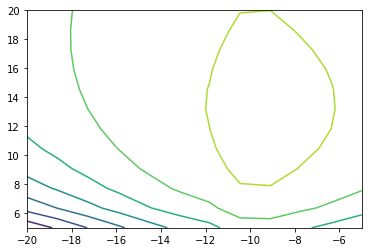

In [27]:
# Part d)
t = [0, 0.1, 0.15, 0.3, 0.5, 0.9, 1.55, 1.7, 3, 5, 7, 9.15]
t_SN = np.linspace(-20, -5, 12)
tau = np.linspace(5, 20, 12)
SN, T = np.meshgrid(t_SN, tau)
L = -np.log(T)-(t-SN)/T
plt.contour(SN, T, L)

### Part e)
> To get a one dimensional distribution for $t_{SN}$, we must integrate over the likelihood function over all values of $F_0$ and $\tau$. Doing so yields the following expression for the probability distribution of $t_{SN}$.
> $$\int_5^{10}\int_5^{10}ln(F_0)-ln(\tau)-\frac{t-t_{SN}}{\tau}dF_0d\tau=t_{SN}ln(32)-5tln(2)$$